In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "^NSEI"
google_data = yf.download(stock, start, end)
google_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0
...,...,...,...,...,...,...
2024-12-02,24276.050781,24276.050781,24301.699219,24008.650391,24140.849609,220400
2024-12-03,24457.150391,24457.150391,24481.349609,24280.000000,24367.500000,339500


Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

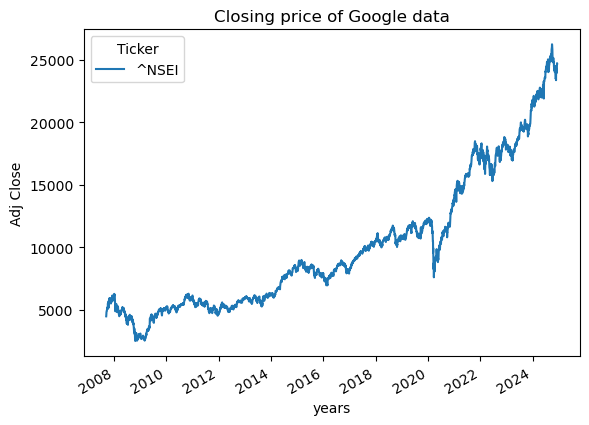

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [5]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

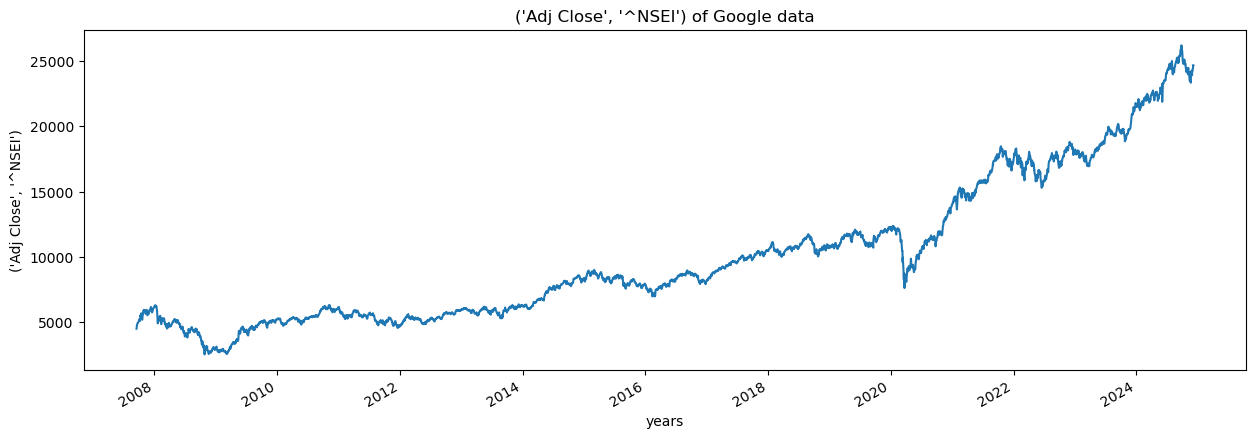

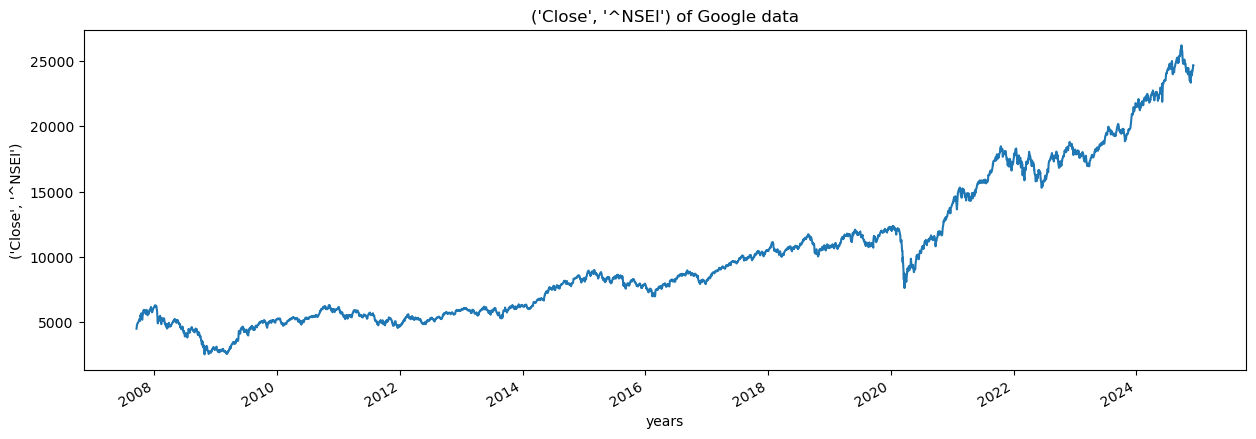

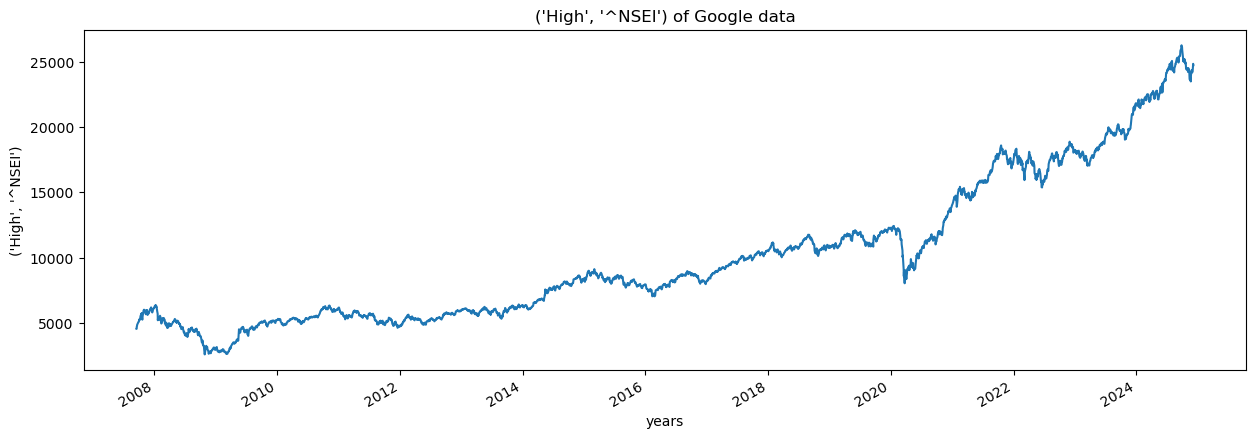

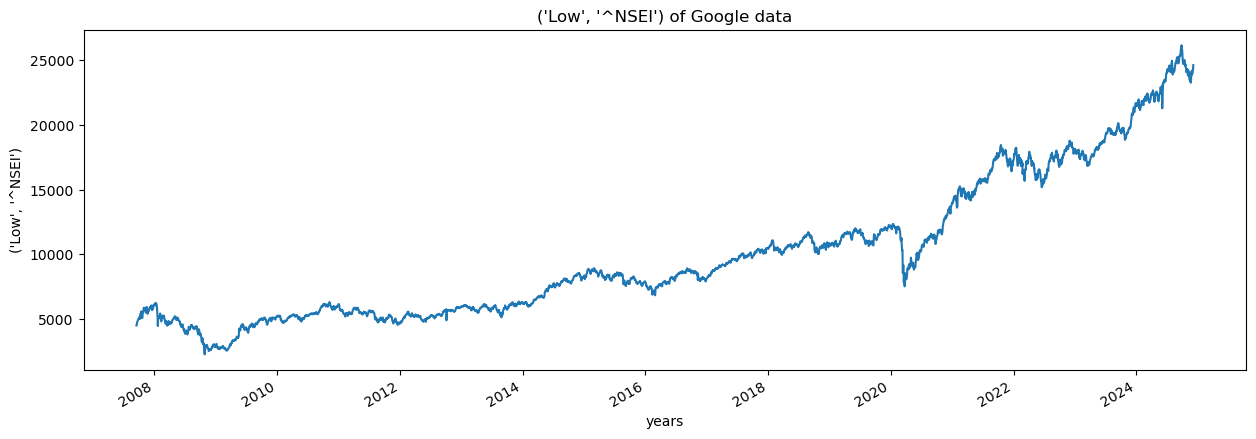

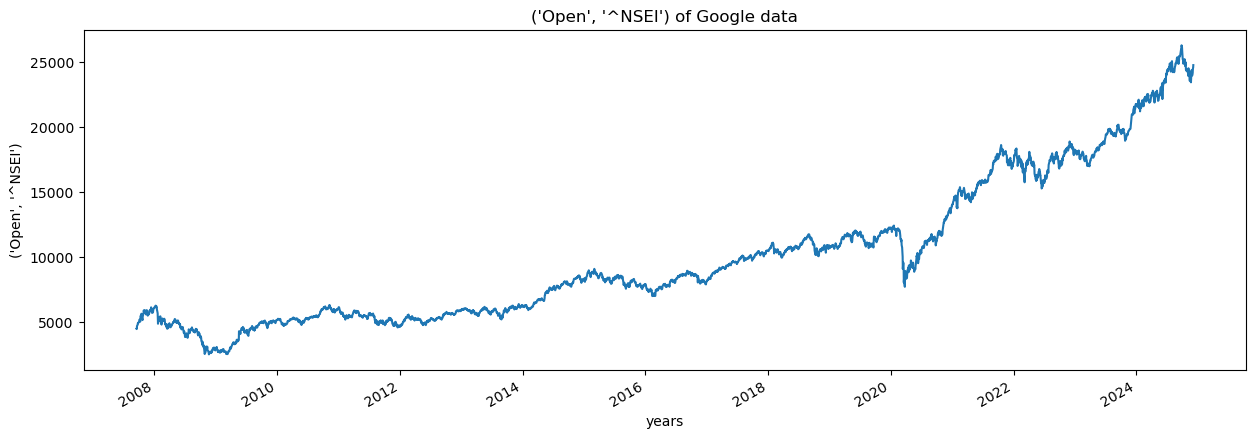

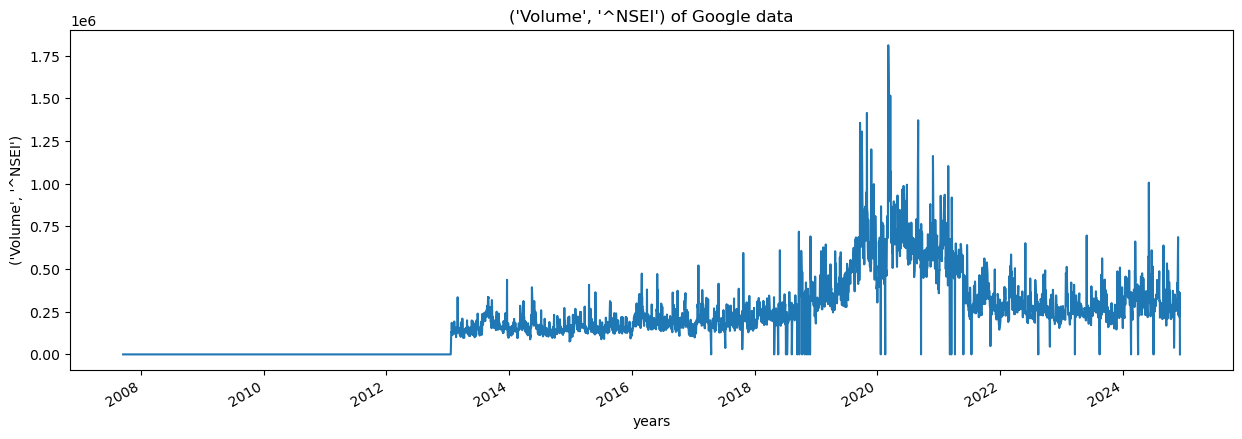

In [6]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [7]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 72
2008 245
2009 241
2010 250
2011 242
2012 242
2013 247
2014 240
2015 244
2016 244
2017 248
2018 245
2019 241
2020 250
2021 248
2022 248
2023 245
2024 230


In [8]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()

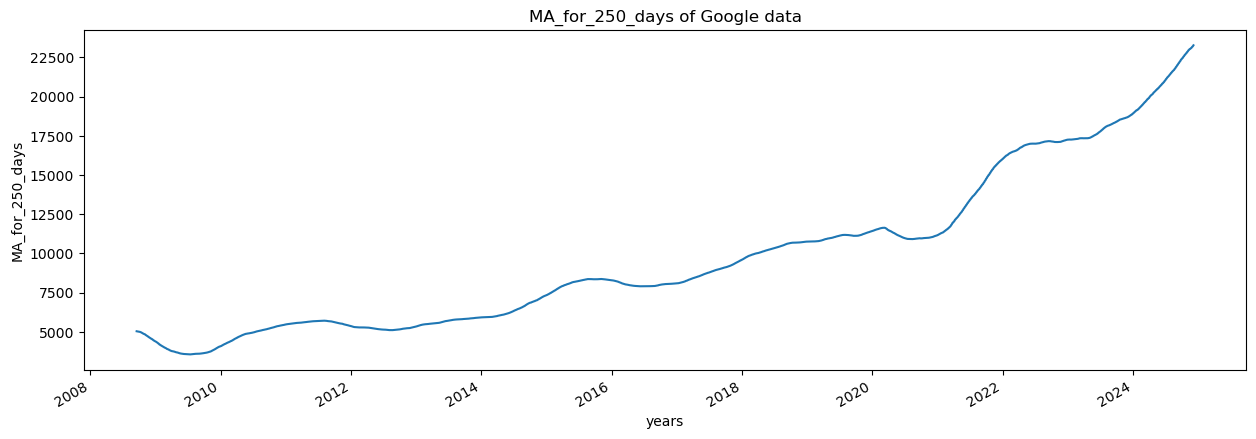

In [9]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

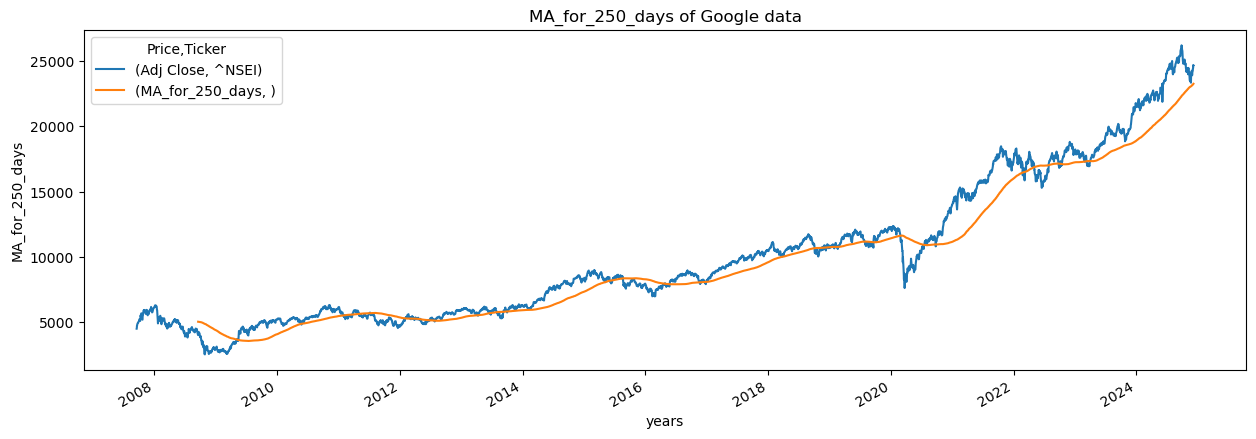

In [10]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

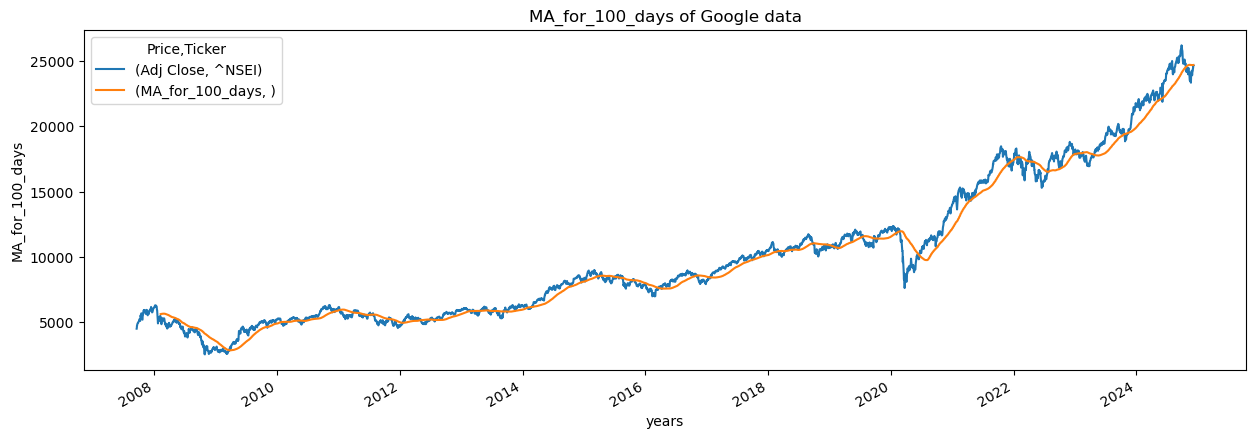

In [11]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

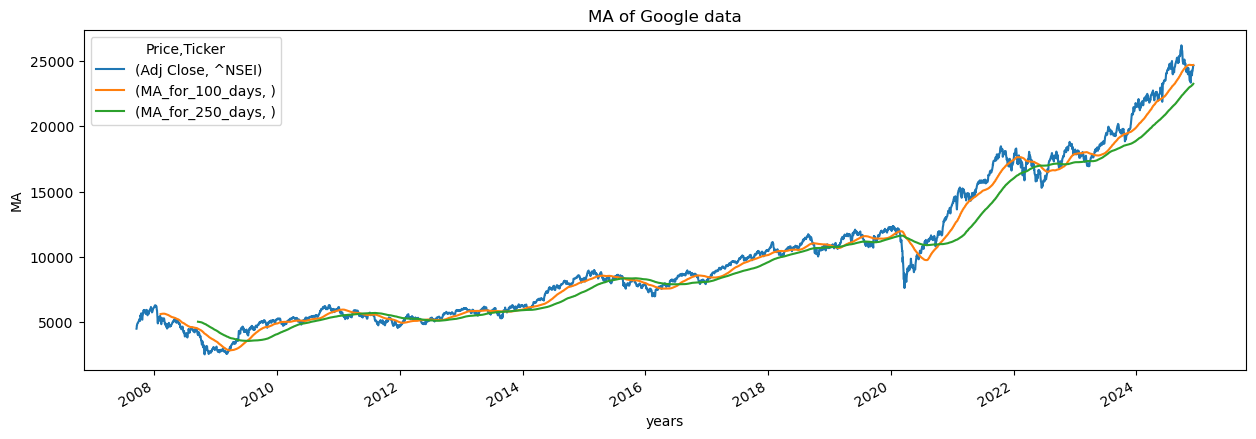

In [12]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [13]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,^NSEI,
Date,,
2007-09-17,4494.649902,NaN
2007-09-18,4546.200195,0.011469
2007-09-19,4732.350098,0.040946
2007-09-20,4747.549805,0.003212
2007-09-21,4837.549805,0.018957


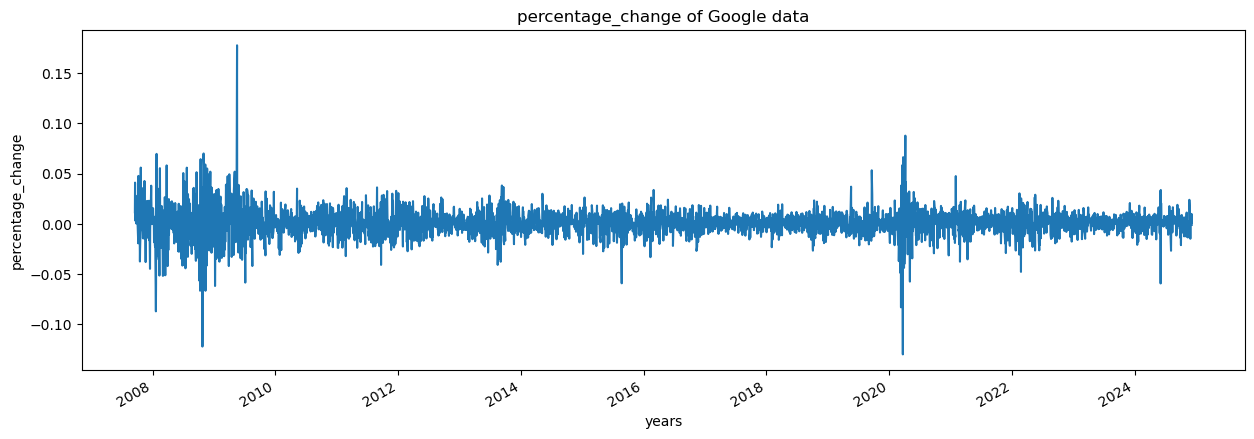

In [14]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [15]:
Adj_close_price = google_data[['Adj Close']]

In [16]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([26216.05078125]), array([2524.19995117]))

In [17]:
from sklearn.preprocessing import MinMaxScaler

train_size = int(len(Adj_close_price) * 0.8)
train_data = Adj_close_price[:train_size]
test_data = Adj_close_price[train_size:]

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

test_scaled = scaler.transform(test_data)

In [18]:
import numpy as np

# Combine scaled train and test data
scaled_data = np.vstack((train_scaled, test_scaled))

# Create sequences of 100 timesteps and split into training and testing sets
sequence_length = 100
x_data = np.array([scaled_data[i-sequence_length:i] for i in range(sequence_length, len(scaled_data))])
y_data = scaled_data[sequence_length:]

splitting_len = int(len(x_data) * 0.7)
x_train, y_train = x_data[:splitting_len], y_data[:splitting_len]
x_test, y_test = x_data[splitting_len:], y_data[splitting_len:]

# Print shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2885, 100, 1)
y_train shape: (2885, 1)
x_test shape: (1237, 100, 1)
y_test shape: (1237, 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the LSTM model
model = Sequential()

# Add input layer
model.add(Input(shape=(x_train.shape[1], x_train.shape[2])))

# Add LSTM layers and Dropout
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Add Dense layers
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0356 - val_loss: 0.0070
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.7198e-04 - val_loss: 0.0037
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.8063e-04 - val_loss: 0.0054
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.3247e-04 - val_loss: 0.0039
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.6055e-04 - val_loss: 0.0053
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 6.5387e-04 - val_loss: 0.0037
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 5

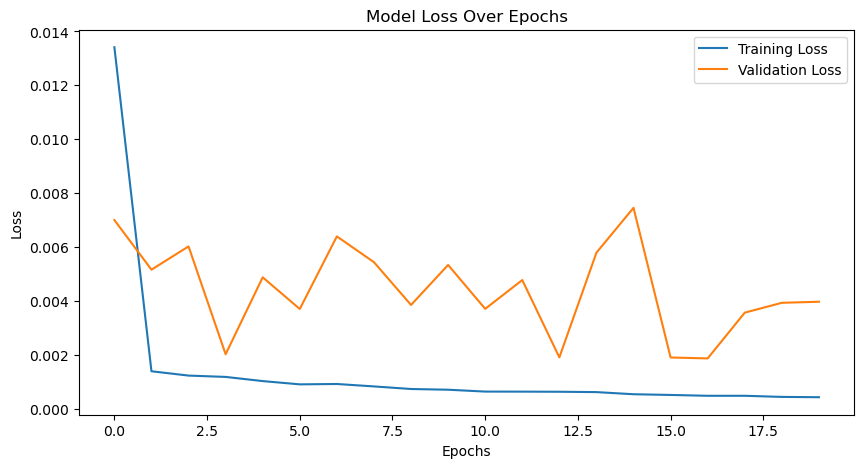

In [23]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train)
y_test_actual = scaler.inverse_transform(y_test)

# Print sample predictions vs actual
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': test_predictions.flatten()})
print(comparison.head())

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
         Actual     Predicted
0  11937.500000  11855.881836
1  11856.799805  11848.860352
2  11910.150391  11835.581055
3  11971.799805  11821.067383
4  12086.700195  11809.288086


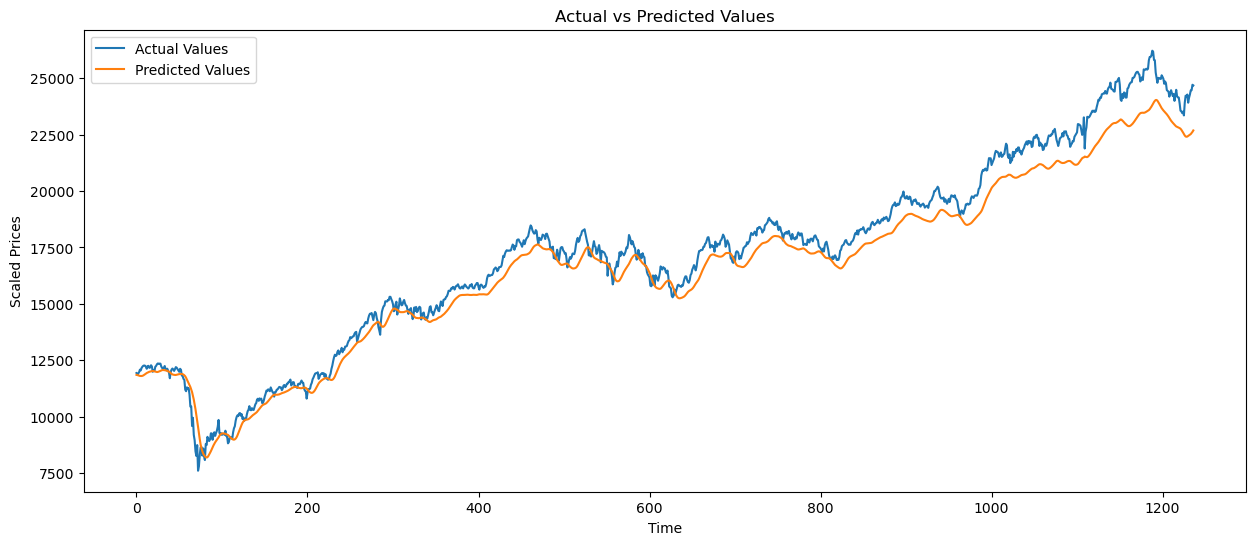

In [29]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label="Actual Values")
plt.plot(test_predictions, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Scaled Prices")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

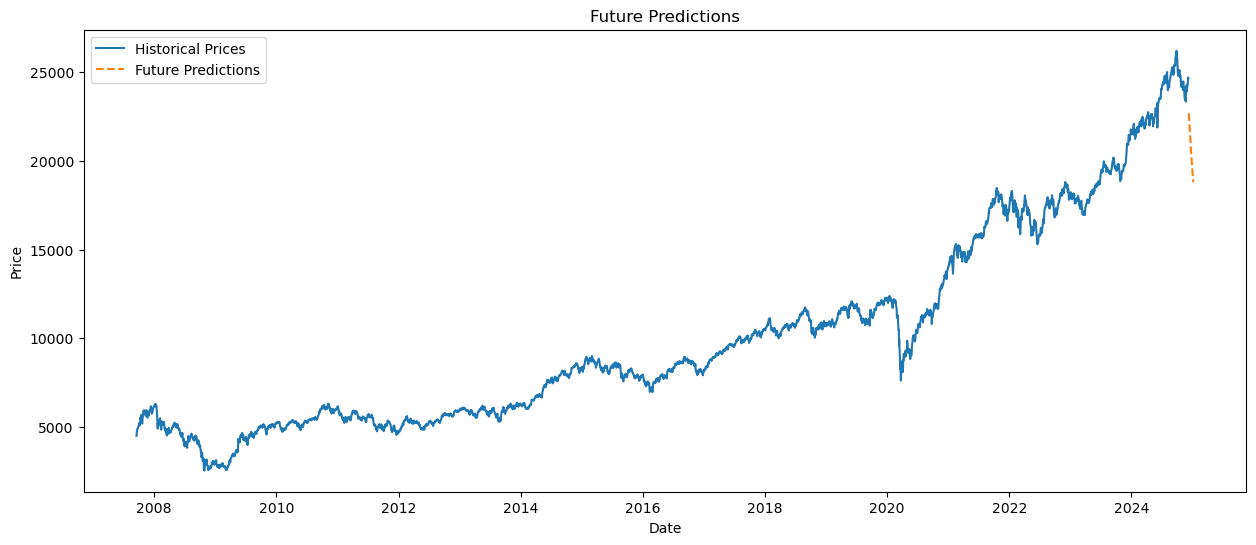

In [30]:
from datetime import timedelta

future_steps = 30

last_sequence = x_test[-1]

future_predictions = []

current_sequence = last_sequence
for _ in range(future_steps):
    next_prediction = model.predict(current_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_prediction[0, 0])
    current_sequence = np.append(current_sequence[1:], next_prediction, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_date = google_data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_steps + 1)]

future_df = pd.DataFrame({'Date': future_dates, 'Predicted': future_predictions.flatten()})

print(future_df)

plt.figure(figsize=(15, 6))
plt.plot(google_data.index, google_data['Adj Close'], label="Historical Prices")
plt.plot(future_df['Date'], future_df['Predicted'], label="Future Predictions", linestyle='--')
plt.title("Future Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [ ]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

In [ ]:
model.summary()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

# Download stock data
stock = "^NSEI"
google_data = yf.download(stock, start, end)

In [ ]:
# Drop NaN values
google_data = google_data[['Adj Close']].dropna()

# Create training and testing split
train_size = int(len(google_data) * 0.7)
train_data = google_data[:train_size]
test_data = google_data[train_size:]

# Scale training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

# Scale test data using the scaler fitted on the training data
test_scaled = scaler.transform(test_data)

# Create sequences for training and testing
sequence_length = 100
x_train, y_train = [], []
x_test, y_test = [], []


In [ ]:
for i in range(sequence_length, len(train_scaled)):
    x_train.append(train_scaled[i - sequence_length:i])
    y_train.append(train_scaled[i])

for i in range(sequence_length, len(test_scaled)):
    x_test.append(test_scaled[i - sequence_length:i])
    y_test.append(test_scaled[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)

# Generate predictions
predictions = model.predict(x_test)

# Inverse transform predictions and test data to original scale
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print(f"Root Mean Square Error: {rmse}")

# Plot results
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.flatten(),
        'predictions': inv_predictions.flatten(),
    },
    index=google_data.index[train_size + sequence_length:],
)

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ploting_data['original_test_data'], label='Original Test Data')
plt.plot(ploting_data['predictions'], label='Predictions')
plt.legend()
plt.title("Original vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
from datetime import datetime, timedelta

# Predict for 3 months after the test data
future_predictions = []
last_sequence = test_scaled[-sequence_length:].copy()  # Start with the last sequence of test data

for _ in range(90):  # Predict for approximately 90 days (3 months)
    next_pred = model.predict(last_sequence[np.newaxis, :, :])
    future_predictions.append(next_pred[0, 0])
    # Update the sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Inverse transform future predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for future predictions
last_date = google_data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]
future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(google_data['Adj Close'], label='Historical Data')
plt.plot(ploting_data['original_test_data'], label='Test Data')
plt.plot(future_data['Future Predictions'], label='Future Predictions (3 months)')
plt.legend()
plt.title("Stock Price Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
